# Load KBase

In [1]:
# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the KBase
import cobrakbase
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())

# prevent excessive warnings
from time import process_time
import warnings
warnings.filterwarnings(action='once')
%run ../../../modelseedpy/community/mssmetana.py

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


In [2]:
def test_pair(member1, member2, community):
    try:
        start_time = process_time()
        comm = MSSmetana([member1, member2], community)
        comm.all_scores()
        end_time = process_time()

        print(f"The {member1.id}_{member2.id} pair has been examined after {(end_time-start_time)/60} minutes.")
    except Exception as e:
        print(e)

# test community pairs

# "+" interactions

## YR343 on CF142

In [3]:
# from cobra.medium import minimal_medium
# media = minimal_medium(YR343, minimize_components=True).to_dict()

In [4]:
# print(media)
# for cpd in media:
#     print(cpd)

In [5]:
# load the pair
YR343 = kbase_api.get_from_ws("Pantoea_YR343_pacbio_v2.RAST.fbamodel", 114731)
CF142 = kbase_api.get_from_ws("Rhizobium_CF142_pacbio_v2.RAST.fbamodel", 114731)
YR343_CF142_model = kbase_api.get_from_ws("YR343-CF142", 114731)
test_pair(YR343, CF142, YR343_CF142_model)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## YR343 on CF313

In [6]:
# load the pair
CF313 = kbase_api.get_from_ws("Variovorax_CF313_pacbio_v2.RAST.fbamodel",114731)
YR343_CF313_model = kbase_api.get_from_ws("YR343-CF313",114731)
test_pair(YR343, CF313, YR343_CF313_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pantoea_YR343_pacbio_v2.RAST.fbamodel on Variovorax_CF313_pacbio_v2.RAST.fbamodel) MRO score: 1.0 (100.00%). This is the percent of nutritional requirements in Pantoea_YR343_pacbio_v2.RAST.fbamodel that overlap with Variovorax_CF313_pacbio_v2.RAST.fbamodel) (17/17).

The Variovorax_CF313_pacbio_v2.RAST.fbamodel on Pantoea_YR343_pacbio_v2.RAST.fbamodel) MRO score: 0.8947368421052632 (89.47%). This is the percent of nutritional requirements in Variovorax_CF313_pacbio_v2.RAST.fbamodel that overlap with Pantoea_YR343_pacbio_v2.RAST.fbamodel) (17/19).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': {'cpd00001_e0': 1.0,
                                           'cpd00007_e0': 1.0,
                                           'cpd00013_e0': 0.55,
                                           'cpd00017_e0': 1.0,
                                           'cpd00023_e0': 1.0,
                                           'cpd00027_e0': 0.12,
                                           'cpd00028_e0': 1.0,
                                           'cpd00030_e0': 1.0,
                                           'cpd00034_e0': 1.0,
                                           'cpd00036_e0': 0.11,
                                           'cpd00039_e0': 1.0,
                                           'cpd00048_e0': 1.0,
                                         

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 732
MP score:			The possible contributions of each member in the member media include:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': ['cpd00132_e0',
                                           'cpd00033_e0',
                                           'cpd00029_e0',
                                           'cpd00161_e0',
                                           'cpd00060_e0',
                                           'cpd00130_e0',
                                           'cpd00036_e0',
                                           'cpd00092_e0',
                                           'cpd00067_e0',
                                           'cpd00066_e0',
                                           'cpd00136_e0',
                                           'cpd00035_e0',
                     

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 0.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 59.43},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': {'Pantoea_YR343_pacbio_v2.RAST.fbamodel': 46.839999999999996}}
The Pantoea_YR343_pacbio_v2.RAST.fbamodel_Variovorax_CF313_pacbio_v2.RAST.fbamodel pair has been examined after 1.5453125 minutes.


## AP49 on BC15

In [7]:
AP49 = kbase_api.get_from_ws("Sphingobium_AP49_pacbio_v2.RAST.fbamodel", 114731)
BC15 = kbase_api.get_from_ws("Bacillus_sp._bc15.RAST.fbamodel", 114731)
AP49_BC15_model = kbase_api.get_from_ws("AP49-BC15", 114731)
test_pair(AP49, BC15, AP49_BC15_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 3 change(s): {'dictionary_item_removed': [root['EX_cpd00009_e0']], 'values_changed': {"root['EX_cpd00122_e0']": {'new_value': 871.3299909746049, 'old_value': 892.2551111157145}, "root['EX_cpd10515_e0']": {'new_value': 0.049712790827395416, 'old_value': 0.049712790829062214}}}

The Sphingobium_AP49_pacbio_v2.RAST.fbamodel on Bacillus_sp._bc15.RAST.fbamodel) MRO score: 0.7142857142857143 (71.43%). This is the percent of nutritional requirements in Sphingobium_AP49_pacbio_v2.RAST.fbamodel that overlap with Bacillus_sp._bc15.RAST.fbamodel) (15/21).

The Bacillus_sp._bc15.RAST.fbamodel on Sphingobium_AP49_pacbio_v2.RAST.fbamodel) MRO score: 0.75 (75.00%). This is the percent of nutritional requirements in Bacillus_sp._bc15.RAST.fbamodel that overlap with Sphingobium_AP49_pacbio_v2.

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 1			1 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00009_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Bacillus_sp._bc15.RAST.fbamodel': {'cpd00001_e0': 0.58,
                                     'cpd00007_e0': 1.0,
                                     'cpd00017_e0': 1.0,
                                     'cpd00023_e0': 0.02,
                                     'cpd00024_e0': 0.79,
                                     'cpd00027_e0': 0.98,
                                     'cpd00028_e0': 1.0,
                                     'cpd00030_e0': 1.0,
                                     'cpd00033_e0': 1.0,
                                     'cpd00034_e0': 1.0,
                                     'cpd00039_e0': 1.0,
                                     'cpd00041_e0': 1.0,
                                     'cpd00048_e0': 1.0,
                                   

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 704
MP score:			The possible contributions of each member in the member media include:

{'Bacillus_sp._bc15.RAST.fbamodel': ['cpd00218_e0',
                                     'cpd00075_e0',
                                     'cpd00033_e0',
                                     'cpd00797_e0',
                                     'cpd00130_e0',
                                     'cpd00092_e0',
                                     'cpd00067_e0',
                                     'cpd00066_e0',
                                     'cpd00035_e0',
                                     'cpd00159_e0',
                                     'cpd00001_e0',
                                     'cpd00142_e0',
                                     'cpd00013_e0',
                                     'cpd

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Bacillus_sp._bc15.RAST.fbamodel': None,
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 0.0}}

smetana score:

{'Bacillus_sp._bc15.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 55.65000000000001},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 46.08}}
The Sphingobium_AP49_pacbio_v2.RAST.fbamodel_Bacillus_sp._bc15.RAST.fbamodel pair has been examined after 1.38828125 minutes.


## CF142 on BC15

In [8]:
CF142_BC15_model = kbase_api.get_from_ws("CF142-BC15", 114731)
test_pair(CF142, BC15, CF142_BC15_model)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## CF402 on CF313

In [9]:
CF402 = kbase_api.get_from_ws("Duagnella_sp_CF402.RAST.fbamodel", 114731)
CF313 = kbase_api.get_from_ws("Variovorax_CF313_pacbio_v2.RAST.fbamodel",114731)
CF402_CF313_model = kbase_api.get_from_ws("CF402-CF313", 114731)
test_pair(CF402, CF313, CF402_CF313_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0005208333333333333 minutes, with 4 change(s): {'dictionary_item_removed': [root['EX_cpd00218_e0'], root['EX_cpd00033_e0'], root['EX_cpd00051_e0']], 'values_changed': {"root['EX_cpd00644_e0']": {'new_value': 0.21844436110800522, 'old_value': 0.23148270960041373}}}

The Duagnella_sp_CF402.RAST.fbamodel on Variovorax_CF313_pacbio_v2.RAST.fbamodel) MRO score: 0.38636363636363635 (38.64%). This is the percent of nutritional requirements in Duagnella_sp_CF402.RAST.fbamodel that overlap with Variovorax_CF313_pacbio_v2.RAST.fbamodel) (17/44).

The Variovorax_CF313_pacbio_v2.RAST.fbamodel on Duagnella_sp_CF402.RAST.fbamodel) MRO score: 0.8947368421052632 (89.47%). This is the percent of nutritional requirements in Variovorax_CF313_pacbio_v2.RAST.fbamodel that overlap with Duagnella_sp_CF402.RAST.fbam

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 3			3 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00218_e0'], root['EX_cpd00033_e0'], root['EX_cpd00051_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Duagnella_sp_CF402.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                      'cpd00018_e0': 1.0,
                                      'cpd00023_e0': 1.0,
                                      'cpd00027_e0': 1.0,
                                      'cpd00028_e0': 1.0,
                                      'cpd00030_e0': 1.0,
                                      'cpd00033_e0': 1.0,
                                      'cpd00034_e0': 1.0,
                                      'cpd00035_e0': 1.0,
                                      'cpd00039_e0': 1.0,
                                      'cpd00041_e0': 1.0,
                                      'cpd00046_e0': 1.0,
                                    

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 802
MP score:			The possible contributions of each member in the member media include:

{'Duagnella_sp_CF402.RAST.fbamodel': ['cpd00218_e0',
                                      'cpd00041_e0',
                                      'cpd00033_e0',
                                      'cpd00023_e0',
                                      'cpd00067_e0',
                                      'cpd00066_e0',
                                      'cpd00161_e0',
                                      'cpd00129_e0',
                                      'cpd00060_e0',
                                      'cpd00084_e0',
                                      'cpd00011_e0',
                                      'cpd00132_e0',
                                      'cpd00054_e0',
                            

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Duagnella_sp_CF402.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 0.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Duagnella_sp_CF402.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 32.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': {'Duagnella_sp_CF402.RAST.fbamodel': 41.65}}
The Duagnella_sp_CF402.RAST.fbamodel_Variovorax_CF313_pacbio_v2.RAST.fbamodel pair has been examined after 0.7098958333333333 minutes.


## CF402 on BC15

In [10]:
CF402 = kbase_api.get_from_ws("Duagnella_sp_CF402.RAST.fbamodel", 114731)
BC15 = kbase_api.get_from_ws("Bacillus_sp._bc15.RAST.fbamodel", 114731)
CF402_BC15_model = kbase_api.get_from_ws("CF402-BC15", 114731)
test_pair(CF402, BC15, CF402_BC15_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 7 change(s): {'dictionary_item_removed': [root['EX_cpd00218_e0'], root['EX_cpd00039_e0'], root['EX_cpd00069_e0'], root['EX_cpd00066_e0'], root['EX_cpd00184_e0'], root['EX_cpd00060_e0']], 'values_changed': {"root['EX_cpd00084_e0']": {'new_value': 263.4964138451307, 'old_value': 263.4964138451314}}}

The Duagnella_sp_CF402.RAST.fbamodel on Bacillus_sp._bc15.RAST.fbamodel) MRO score: 0.36363636363636365 (36.36%). This is the percent of nutritional requirements in Duagnella_sp_CF402.RAST.fbamodel that overlap with Bacillus_sp._bc15.RAST.fbamodel) (16/44).

The Bacillus_sp._bc15.RAST.fbamodel on Duagnella_sp_CF402.RAST.fbamodel) MRO score: 0.8 (80.00%). This is the percent of nutritional requirements in Bacillus_sp._bc15.RAST.fbamodel that overlap with Duagnella_sp_CF402.RAST.fbamo

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 6			6 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00218_e0'], root['EX_cpd00039_e0'], root['EX_cpd00069_e0'], root['EX_cpd00066_e0'], root['EX_cpd00184_e0'], root['EX_cpd00060_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Bacillus_sp._bc15.RAST.fbamodel': {'cpd00001_e0': 0.58,
                                     'cpd00007_e0': 1.0,
                                     'cpd00017_e0': 1.0,
                                     'cpd00023_e0': 0.02,
                                     'cpd00024_e0': 0.79,
                                     'cpd00027_e0': 0.98,
                                     'cpd00028_e0': 1.0,
                                     'cpd00030_e0': 1.0,
                                     'cpd00033_e0': 1.0,
                                     'cpd00034_e0': 1.0,
                                     'cpd00039_e0': 1.0,
                             

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 737
MP score:			The possible contributions of each member in the member media include:

{'Bacillus_sp._bc15.RAST.fbamodel': ['cpd00218_e0',
                                     'cpd00075_e0',
                                     'cpd00033_e0',
                                     'cpd00060_e0',
                                     'cpd00438_e0',
                                     'cpd00064_e0',
                                     'cpd00092_e0',
                                     'cpd00067_e0',
                                     'cpd00035_e0',
                                     'cpd00159_e0',
                                     'cpd00001_e0',
                                     'cpd00142_e0',
                                     'cpd00013_e0',
                                     'cpd

In [11]:
from cobra.medium import minimal_medium
display(sorted(list(minimal_medium(CF402, minimize_components=True).keys())))
display(sorted(list(minimal_medium(BC15, minimize_components=True).keys())))
display(set(list(minimal_medium(BC15, minimize_components=True).keys())) & set(list(minimal_medium(CF402, minimize_components=True).keys())))

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


['EX_cpd00007_e0',
 'EX_cpd00018_e0',
 'EX_cpd00023_e0',
 'EX_cpd00027_e0',
 'EX_cpd00028_e0',
 'EX_cpd00030_e0',
 'EX_cpd00033_e0',
 'EX_cpd00034_e0',
 'EX_cpd00035_e0',
 'EX_cpd00039_e0',
 'EX_cpd00041_e0',
 'EX_cpd00046_e0',
 'EX_cpd00048_e0',
 'EX_cpd00051_e0',
 'EX_cpd00054_e0',
 'EX_cpd00058_e0',
 'EX_cpd00060_e0',
 'EX_cpd00063_e0',
 'EX_cpd00065_e0',
 'EX_cpd00066_e0',
 'EX_cpd00069_e0',
 'EX_cpd00091_e0',
 'EX_cpd00099_e0',
 'EX_cpd00107_e0',
 'EX_cpd00119_e0',
 'EX_cpd00126_e0',
 'EX_cpd00129_e0',
 'EX_cpd00149_e0',
 'EX_cpd00156_e0',
 'EX_cpd00161_e0',
 'EX_cpd00184_e0',
 'EX_cpd00205_e0',
 'EX_cpd00215_e0',
 'EX_cpd00218_e0',
 'EX_cpd00220_e0',
 'EX_cpd00239_e0',
 'EX_cpd00254_e0',
 'EX_cpd00322_e0',
 'EX_cpd00381_e0',
 'EX_cpd00393_e0',
 'EX_cpd00644_e0',
 'EX_cpd00654_e0',
 'EX_cpd00793_e0',
 'EX_cpd10516_e0']

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


['EX_cpd00007_e0',
 'EX_cpd00028_e0',
 'EX_cpd00030_e0',
 'EX_cpd00034_e0',
 'EX_cpd00048_e0',
 'EX_cpd00058_e0',
 'EX_cpd00063_e0',
 'EX_cpd00084_e0',
 'EX_cpd00099_e0',
 'EX_cpd00149_e0',
 'EX_cpd00156_e0',
 'EX_cpd00205_e0',
 'EX_cpd00220_e0',
 'EX_cpd00254_e0',
 'EX_cpd00305_e0',
 'EX_cpd00322_e0',
 'EX_cpd00355_e0',
 'EX_cpd00393_e0',
 'EX_cpd00654_e0',
 'EX_cpd10515_e0']

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


{'EX_cpd00007_e0',
 'EX_cpd00028_e0',
 'EX_cpd00030_e0',
 'EX_cpd00034_e0',
 'EX_cpd00048_e0',
 'EX_cpd00058_e0',
 'EX_cpd00063_e0',
 'EX_cpd00099_e0',
 'EX_cpd00149_e0',
 'EX_cpd00156_e0',
 'EX_cpd00205_e0',
 'EX_cpd00220_e0',
 'EX_cpd00254_e0',
 'EX_cpd00322_e0',
 'EX_cpd00393_e0',
 'EX_cpd00654_e0'}

# "-" interactions

## GM17 on CF142

In [12]:
GM17 = kbase_api.get_from_ws("Pseudomonas_GM17_pacbio_v2.RAST.fbamodel", 114731)
CF142 = kbase_api.get_from_ws("Rhizobium_CF142_pacbio_v2.RAST.fbamodel", 114731)
GM17_CF142_model = kbase_api.get_from_ws("GM17-CF142", 114731)
test_pair(GM17, CF142, GM17_CF142_model)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## GM17 on BC15

In [13]:
GM17 = kbase_api.get_from_ws("Pseudomonas_GM17_pacbio_v2.RAST.fbamodel", 114731)
BC15 = kbase_api.get_from_ws("Bacillus_sp._bc15.RAST.fbamodel", 114731)
GM17_BC15_model = kbase_api.get_from_ws("GM17-BC15", 114731)
test_pair(GM17, BC15, GM17_BC15_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Bacillus_sp._bc15.RAST.fbamodel) MRO score: 0.8181818181818182 (81.82%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Bacillus_sp._bc15.RAST.fbamodel) (18/22).

The Bacillus_sp._bc15.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.9 (90.00%). This is the percent of nutritional requirements in Bacillus_sp._bc15.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) (18/20).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Bacillus_sp._bc15.RAST.fbamodel': {'cpd00001_e0': 0.58,
                                     'cpd00007_e0': 1.0,
                                     'cpd00017_e0': 1.0,
                                     'cpd00023_e0': 0.02,
                                     'cpd00024_e0': 0.79,
                                     'cpd00027_e0': 0.98,
                                     'cpd00028_e0': 1.0,
                                     'cpd00030_e0': 1.0,
                                     'cpd00033_e0': 1.0,
                                     'cpd00034_e0': 1.0,
                                     'cpd00039_e0': 1.0,
                                     'cpd00041_e0': 1.0,
                                     'cpd00048_e0': 1.0,
                                     'cpd00051_e0': 1.0

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 714
MP score:			The possible contributions of each member in the member media include:

{'Bacillus_sp._bc15.RAST.fbamodel': ['cpd00132_e0',
                                     'cpd00075_e0',
                                     'cpd00033_e0',
                                     'cpd00797_e0',
                                     'cpd00130_e0',
                                     'cpd00092_e0',
                                     'cpd00067_e0',
                                     'cpd00066_e0',
                                     'cpd00035_e0',
                                     'cpd00159_e0',
                                     'cpd00001_e0',
                                     'cpd00142_e0',
                                     'cpd00182_e0',
                                     'cpd

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Bacillus_sp._bc15.RAST.fbamodel': None,
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 0.0}}

smetana score:

{'Bacillus_sp._bc15.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 53.62000000000001},
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 48.019999999999996}}
The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel_Bacillus_sp._bc15.RAST.fbamodel pair has been examined after 2.654427083333333 minutes.


## CF313 on CF142 

In [14]:
CF313_CF142_model = kbase_api.get_from_ws("CF313-CF142", 114731)
test_pair(CF313, CF142, CF313_CF142_model)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## AP07 on AP49

In [15]:
AP07 = kbase_api.get_from_ws("Caulobacter_AP07_pacbio_v2.RAST.fbamodel", 114731)
AP49 = kbase_api.get_from_ws("Sphingobium_AP49_pacbio_v2.RAST.fbamodel", 114731)
AP07_AP49_model = kbase_api.get_from_ws("AP07-AP49", 114731)
test_pair(AP07, AP49, AP07_AP49_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 1 change(s): {'values_changed': {"root['EX_cpd10515_e0']": {'new_value': 0.11249820039737854, 'old_value': 0.11249820039904534}}}

The Caulobacter_AP07_pacbio_v2.RAST.fbamodel on Sphingobium_AP49_pacbio_v2.RAST.fbamodel) MRO score: 0.9 (90.00%). This is the percent of nutritional requirements in Caulobacter_AP07_pacbio_v2.RAST.fbamodel that overlap with Sphingobium_AP49_pacbio_v2.RAST.fbamodel) (18/20).

The Sphingobium_AP49_pacbio_v2.RAST.fbamodel on Caulobacter_AP07_pacbio_v2.RAST.fbamodel) MRO score: 0.8571428571428571 (85.71%). This is the percent of nutritional requirements in Sphingobium_AP49_pacbio_v2.RAST.fbamodel that overlap with Caulobacter_AP07_pacbio_v2.RAST.fbamodel) (18/21).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                              'cpd00009_e0': 1.0,
                                              'cpd00017_e0': 1.0,
                                              'cpd00023_e0': 0.04,
                                              'cpd00028_e0': 1.0,
                                              'cpd00030_e0': 1.0,
                                              'cpd00033_e0': 0.13,
                                              'cpd00034_e0': 1.0,
                                              'cpd00036_e0': 0.47,
                                              'cpd00039_e0': 1.0,
                                              'cpd00048_e0': 1.0,
                                              'cpd00051_e0': 1.0,
     

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 641
MP score:			The possible contributions of each member in the member media include:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': ['cpd00075_e0',
                                              'cpd00033_e0',
                                              'cpd00023_e0',
                                              'cpd00412_e0',
                                              'cpd00060_e0',
                                              'cpd00036_e0',
                                              'cpd00067_e0',
                                              'cpd00066_e0',
                                              'cpd00035_e0',
                                              'cpd00001_e0',
                                              'cpd00249_e0',
                                              

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 0.0},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 42.099999999999994},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': 45.07999999999999}}
The Caulobacter_AP07_pacbio_v2.RAST.fbamodel_Sphingobium_AP49_pacbio_v2.RAST.fbamodel pair has been examined after 1.11875 minutes.


## CF313 on BT03

In [16]:
BT03 = kbase_api.get_from_ws("Burkholderia_sp._BT03.RAST.fbamodel", 114731)
CF313 = kbase_api.get_from_ws("Variovorax_CF313_pacbio_v2.RAST.fbamodel",114731)
CF313_BT03_model = kbase_api.get_from_ws("CF313-BT03", 114731)
test_pair(CF313, BT03, CF313_BT03_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Variovorax_CF313_pacbio_v2.RAST.fbamodel on Burkholderia_sp._BT03.RAST.fbamodel) MRO score: 0.9473684210526315 (94.74%). This is the percent of nutritional requirements in Variovorax_CF313_pacbio_v2.RAST.fbamodel that overlap with Burkholderia_sp._BT03.RAST.fbamodel) (18/19).

The Burkholderia_sp._BT03.RAST.fbamodel on Variovorax_CF313_pacbio_v2.RAST.fbamodel) MRO score: 0.9473684210526315 (94.74%). This is the percent of nutritional requirements in Burkholderia_sp._BT03.RAST.fbamodel that overlap with Variovorax_CF313_pacbio_v2.RAST.fbamodel) (18/19).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Burkholderia_sp._BT03.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                         'cpd00009_e0': 0.31,
                                         'cpd00017_e0': 1.0,
                                         'cpd00023_e0': 0.05,
                                         'cpd00024_e0': 0.01,
                                         'cpd00028_e0': 1.0,
                                         'cpd00030_e0': 1.0,
                                         'cpd00033_e0': 0.01,
                                         'cpd00034_e0': 1.0,
                                         'cpd00036_e0': 0.05,
                                         'cpd00039_e0': 1.0,
                                         'cpd00041_e0': 0.11,
                                         'cpd00048_e0': 1.0,
 

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 113
MP score:			The possible contributions of each member in the member media include:

{'Burkholderia_sp._BT03.RAST.fbamodel': ['cpd00218_e0',
                                         'cpd00075_e0',
                                         'cpd00033_e0',
                                         'cpd00105_e0',
                                         'cpd00060_e0',
                                         'cpd00130_e0',
                                         'cpd00036_e0',
                                         'cpd00092_e0',
                                         'cpd00067_e0',
                                         'cpd00066_e0',
                                         'cpd00035_e0',
                                         'cpd00159_e0',
                                         'cpd

## YR139 on CF142

In [17]:
YR139 = kbase_api.get_from_ws("Streptomyces_YR139_pacbio_v2.RAST.fbamodel", 114731)
YR139_CF142_model = kbase_api.get_from_ws("YR139-CF142", 114731)
test_pair(YR139, CF142, YR139_CF142_model)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## GM17 on AP49

In [18]:
GM17_AP49_model = kbase_api.get_from_ws("GM17-AP49", 114731)
test_pair(GM17, AP49, GM17_AP49_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.00026041666666666666 minutes, with 3 change(s): {'values_changed': {"root['EX_cpd00104_e0']": {'new_value': 0.00028061591519064496, 'old_value': 0.00028061591592631885}, "root['EX_cpd10515_e0']": {'new_value': 0.0008418477462105933, 'old_value': 0.0008418477478773931}, "root['EX_cpd00122_e0']": {'new_value': 502.2274625035884, 'old_value': 892.2551111157145}}}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Sphingobium_AP49_pacbio_v2.RAST.fbamodel) MRO score: 0.7727272727272727 (77.27%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Sphingobium_AP49_pacbio_v2.RAST.fbamodel) (17/22).

The Sphingobium_AP49_pacbio_v2.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.8095238095238095 (80.95%). This is the perce

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                              'cpd00017_e0': 1.0,
                                              'cpd00027_e0': 1.0,
                                              'cpd00028_e0': 1.0,
                                              'cpd00030_e0': 1.0,
                                              'cpd00034_e0': 1.0,
                                              'cpd00039_e0': 1.0,
                                              'cpd00041_e0': 1.0,
                                              'cpd00048_e0': 1.0,
                                              'cpd00051_e0': 1.0,
                                              'cpd00053_e0': 1.0,
                                              'cpd00054_e0': 1.0,
        

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 601
MP score:			The possible contributions of each member in the member media include:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': ['cpd00218_e0',
                                              'cpd00075_e0',
                                              'cpd00033_e0',
                                              'cpd00060_e0',
                                              'cpd00064_e0',
                                              'cpd00036_e0',
                                              'cpd00092_e0',
                                              'cpd00067_e0',
                                              'cpd00136_e0',
                                              'cpd00035_e0',
                                              'cpd00159_e0',
                                              

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 0.0},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 47.05},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 45.08}}
The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel_Sphingobium_AP49_pacbio_v2.RAST.fbamodel pair has been examined after 2.2739583333333333 minutes.


## GM17 on CF313

In [19]:
GM17_CF313_model = kbase_api.get_from_ws("GM17-CF313", 114731)
test_pair(GM17, CF313, GM17_CF313_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Variovorax_CF313_pacbio_v2.RAST.fbamodel) MRO score: 0.8636363636363636 (86.36%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Variovorax_CF313_pacbio_v2.RAST.fbamodel) (19/22).

The Variovorax_CF313_pacbio_v2.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 1.0 (100.00%). This is the percent of nutritional requirements in Variovorax_CF313_pacbio_v2.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) (19/19).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                              'cpd00017_e0': 1.0,
                                              'cpd00027_e0': 1.0,
                                              'cpd00028_e0': 1.0,
                                              'cpd00030_e0': 1.0,
                                              'cpd00034_e0': 1.0,
                                              'cpd00039_e0': 1.0,
                                              'cpd00041_e0': 1.0,
                                              'cpd00048_e0': 1.0,
                                              'cpd00051_e0': 1.0,
                                              'cpd00053_e0': 1.0,
                                              'cpd00054_e0': 1.0,
        

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 752
MP score:			The possible contributions of each member in the member media include:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': ['cpd00218_e0',
                                              'cpd00075_e0',
                                              'cpd00033_e0',
                                              'cpd00060_e0',
                                              'cpd00130_e0',
                                              'cpd00036_e0',
                                              'cpd00092_e0',
                                              'cpd00067_e0',
                                              'cpd00066_e0',
                                              'cpd00035_e0',
                                              'cpd00159_e0',
                                              

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 0.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 47.54},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 44.480000000000004}}
The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel_Variovorax_CF313_pacbio_v2.RAST.fbamodel pair has been examined after 2.3994791666666666 minutes.


## GM17 on AP07

In [20]:
GM17_AP07_model = kbase_api.get_from_ws("GM17-AP07", 114731)
test_pair(GM17, AP07, GM17_AP07_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Caulobacter_AP07_pacbio_v2.RAST.fbamodel) MRO score: 0.8181818181818182 (81.82%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Caulobacter_AP07_pacbio_v2.RAST.fbamodel) (18/22).

The Caulobacter_AP07_pacbio_v2.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.9 (90.00%). This is the percent of nutritional requirements in Caulobacter_AP07_pacbio_v2.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) (18/20).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                              'cpd00009_e0': 1.0,
                                              'cpd00017_e0': 1.0,
                                              'cpd00023_e0': 0.04,
                                              'cpd00028_e0': 1.0,
                                              'cpd00030_e0': 1.0,
                                              'cpd00033_e0': 0.13,
                                              'cpd00034_e0': 1.0,
                                              'cpd00036_e0': 0.47,
                                              'cpd00039_e0': 1.0,
                                              'cpd00048_e0': 1.0,
                                              'cpd00051_e0': 1.0,
     

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 714
MP score:			The possible contributions of each member in the member media include:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': ['cpd00218_e0',
                                              'cpd00075_e0',
                                              'cpd00033_e0',
                                              'cpd00023_e0',
                                              'cpd00161_e0',
                                              'cpd00060_e0',
                                              'cpd00036_e0',
                                              'cpd00092_e0',
                                              'cpd00067_e0',
                                              'cpd00066_e0',
                                              'cpd00035_e0',
                                              

## GM17 on CF402

In [21]:
GM17_CF402_model = kbase_api.get_from_ws("GM17-CF402", 114731)
test_pair(GM17, CF402, GM17_CF402_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 5 change(s): {'dictionary_item_removed': [root['EX_cpd00104_e0'], root['EX_cpd00218_e0'], root['EX_cpd00065_e0'], root['EX_cpd00035_e0'], root['EX_cpd00060_e0']]}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Duagnella_sp_CF402.RAST.fbamodel) MRO score: 0.8181818181818182 (81.82%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Duagnella_sp_CF402.RAST.fbamodel) (18/22).

The Duagnella_sp_CF402.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.4090909090909091 (40.91%). This is the percent of nutritional requirements in Duagnella_sp_CF402.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) (18/44).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 5			5 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00104_e0'], root['EX_cpd00218_e0'], root['EX_cpd00065_e0'], root['EX_cpd00035_e0'], root['EX_cpd00060_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Duagnella_sp_CF402.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                      'cpd00018_e0': 1.0,
                                      'cpd00023_e0': 1.0,
                                      'cpd00027_e0': 1.0,
                                      'cpd00028_e0': 1.0,
                                      'cpd00030_e0': 1.0,
                                      'cpd00033_e0': 1.0,
                                      'cpd00034_e0': 1.0,
                                      'cpd00035_e0': 1.0,
                                      'cpd00039_e0': 1.0,
                                      'cpd00041_e0': 1.0,
                                      'cpd0004

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 36
MP score:			The possible contributions of each member in the member media include:

{'Duagnella_sp_CF402.RAST.fbamodel': ['cpd00132_e0',
                                      'cpd00218_e0',
                                      'cpd00041_e0',
                                      'cpd00033_e0',
                                      'cpd00023_e0',
                                      'cpd00067_e0',
                                      'cpd00066_e0',
                                      'cpd00161_e0',
                                      'cpd00129_e0',
                                      'cpd00060_e0',
                                      'cpd00084_e0',
                                      'cpd00119_e0',
                                      'cpd00011_e0',
                             

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Duagnella_sp_CF402.RAST.fbamodel': None,
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Duagnella_sp_CF402.RAST.fbamodel': 0.0}}

smetana score:

{'Duagnella_sp_CF402.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 32.0},
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Duagnella_sp_CF402.RAST.fbamodel': 44.05}}
The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel_Duagnella_sp_CF402.RAST.fbamodel pair has been examined after 1.8322916666666667 minutes.


## GM17 on BT03

In [22]:
GM17_BT03_model = kbase_api.get_from_ws("GM17-BT03", 114731)
test_pair(GM17, BT03, GM17_BT03_model)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Burkholderia_sp._BT03.RAST.fbamodel) MRO score: 0.8181818181818182 (81.82%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Burkholderia_sp._BT03.RAST.fbamodel) (18/22).

The Burkholderia_sp._BT03.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.9473684210526315 (94.74%). This is the percent of nutritional requirements in Burkholderia_sp._BT03.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) (18/19).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Burkholderia_sp._BT03.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                         'cpd00009_e0': 0.31,
                                         'cpd00017_e0': 1.0,
                                         'cpd00023_e0': 0.05,
                                         'cpd00024_e0': 0.01,
                                         'cpd00028_e0': 1.0,
                                         'cpd00030_e0': 1.0,
                                         'cpd00033_e0': 0.01,
                                         'cpd00034_e0': 1.0,
                                         'cpd00036_e0': 0.05,
                                         'cpd00039_e0': 1.0,
                                         'cpd00041_e0': 0.11,
                                         'cpd00048_e0': 1.0,
 

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 104
MP score:			The possible contributions of each member in the member media include:

{'Burkholderia_sp._BT03.RAST.fbamodel': ['cpd00218_e0',
                                         'cpd00075_e0',
                                         'cpd00033_e0',
                                         'cpd00105_e0',
                                         'cpd00060_e0',
                                         'cpd00130_e0',
                                         'cpd00036_e0',
                                         'cpd00092_e0',
                                         'cpd00067_e0',
                                         'cpd00136_e0',
                                         'cpd00035_e0',
                                         'cpd00159_e0',
                                         'cpd

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Burkholderia_sp._BT03.RAST.fbamodel': None,
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Burkholderia_sp._BT03.RAST.fbamodel': 0.0}}

smetana score:

{'Burkholderia_sp._BT03.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 48.32999999999999},
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Burkholderia_sp._BT03.RAST.fbamodel': 48.54}}
The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel_Burkholderia_sp._BT03.RAST.fbamodel pair has been examined after 2.5609375 minutes.


In [23]:
from cobra.medium import minimal_medium
len(minimal_medium(CF402, minimize_components=True))

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


44

# Statistically process the above results

## MRO scores

### Parsed MRO values

In [24]:
# from scipy import stats
# posInteractions = [YR343_CF313.mro[0], AP49_BC15.mro[0], YR343_CF313.mro[0], YR343_CF313.mro[0]]
# negInteractions = [0.8636363636363636, 0.9, 0.9473684210526315, 0.7727272727272727, 0.8636363636363636, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8]

# ttest = stats.ttest_ind(posInteractions, negInteractions)
# print(ttest.pvalue)

In [25]:
from scipy import stats
posInteractions = [1, 0.7619047619047619, 0.38636363636363635, 0.36363636363636365]
negInteractions = [0.8636363636363636, 0.9, 0.9473684210526315, 0.7727272727272727, 0.8636363636363636, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8]

ttest = stats.ttest_ind(posInteractions, negInteractions)
print(ttest.pvalue)

0.054250055299084145


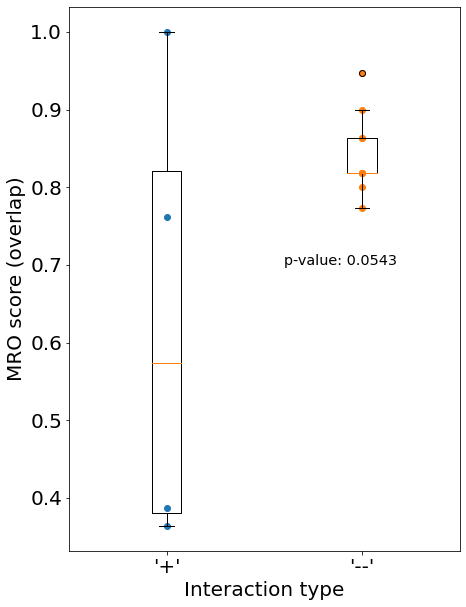

In [26]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions, negInteractions], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions), posInteractions)
pyplot.scatter([2]*len(negInteractions), negInteractions)
pyplot.xlabel("Interaction type")
pyplot.ylabel("MRO score (overlap)")
pyplot.text(1.6,.7, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("parsed MRO comparion.jpg")
# display(fig)
# pyplot.show()

### Averaged MRO values

In [27]:
from scipy import stats
posInteractions = [0.9444444444444444, 0.7804878048780488, 0.5396825396825397, 0.53125]
negInteractions = [0.9047619047619048, 0.8780487804878049, 0.9473684210526315]
negInteractions2 = [0.8095238095238095, 0.926829268292683, 0.9473684210526315, 0.926829268292683, 0.8095238095238095, 0.5757575757575758, 0.8780487804878049]
posInteractions2 = [0.9444444444444444, 0.7804878048780488, 0.5396825396825397, 0.53125]

ttest = stats.ttest_ind(posInteractions2, negInteractions2)
print(ttest.pvalue)

0.18655070991572478


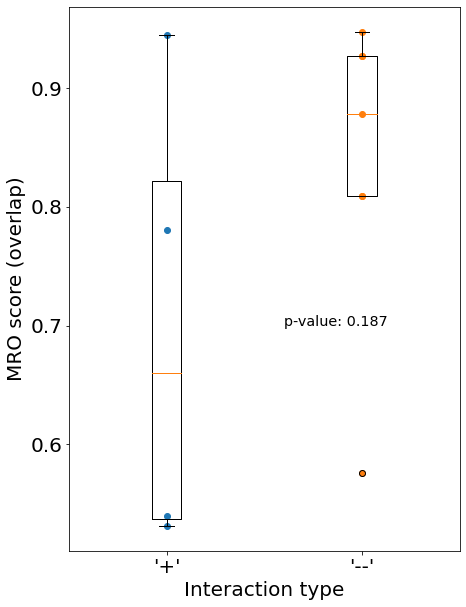

In [28]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions2, negInteractions2], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions2), posInteractions2)
pyplot.scatter([2]*len(negInteractions2), negInteractions2)
pyplot.xlabel("Interaction type")
pyplot.ylabel("MRO score (overlap)")
pyplot.text(1.6,.7, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("MRO comparion.jpg")
# display(fig)
# pyplot.show()

## MIP scores

In [35]:
from scipy import stats
# posInteractions =[YR343_CF313.mip, AP49_BC15.mip, CF402_CF313.mip, CF402_BC15.mip]
# negInteractions = [GM17_BC15.mip, AP07_AP49.mip, CF313_BT03.mip, GM17_AP49.mip, GM17_CF313.mip, GM17_AP07.mip, GM17_CF402.mip, GM17_BT03.mip, CF402_BC15.mip]
negInteractions = [0, 0, 0, 0, 1, 4, 0]
posInteractions = [0, 1, 6, 7]

ttest = stats.ttest_ind(posInteractions, negInteractions)
print(ttest.pvalue)

0.09316300783381472


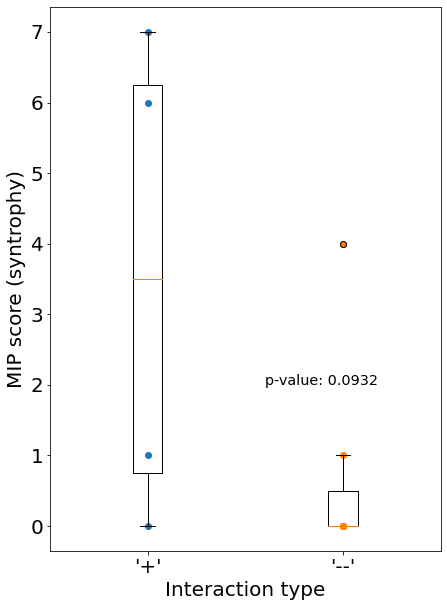

In [36]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions, negInteractions], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions), posInteractions)
pyplot.scatter([2]*len(negInteractions), negInteractions)
pyplot.xlabel("Interaction type")
pyplot.ylabel("MIP score (syntrophy)")
pyplot.text(1.6,2, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("MIP comparion.jpg")
# display(fig)
# pyplot.show()

## smetana score

In [37]:
from scipy import stats
posInteractions = [63.57, 47.18, 52.63, 46, 32, 38, 0, 0]
negInteractions = [53, 48.1, 44.76, 45, 0, 0]

ttest = stats.ttest_ind(posInteractions, negInteractions)
print(ttest.pvalue)

0.8147010129367964


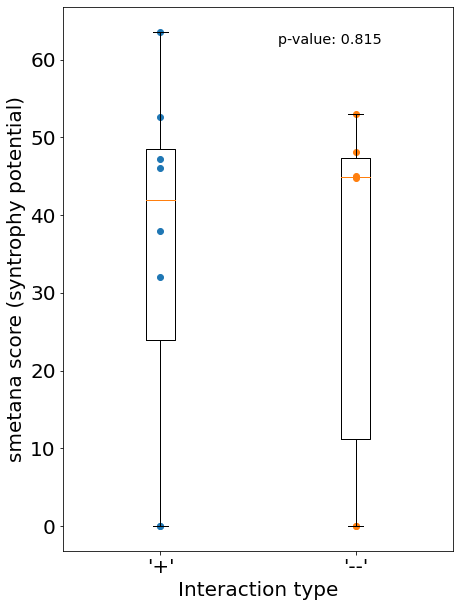

In [38]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions, negInteractions], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions), posInteractions)
pyplot.scatter([2]*len(negInteractions), negInteractions)
pyplot.xlabel("Interaction type")
pyplot.ylabel("smetana score (syntrophy potential)")
pyplot.text(1.6,62, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("smetana comparion.jpg")
# display(fig)
# pyplot.show()